In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [190]:
train=pd.read_csv("titanic_train.csv")


In [191]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [192]:
# Date Preprocessnig

train_data=train[['Survived','Pclass','Sex','Age']]

<AxesSubplot:>

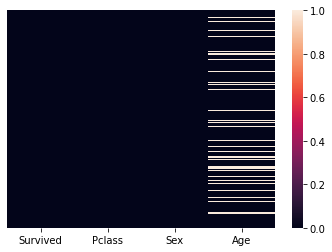

In [193]:
# Handle missing values
sns.heatmap(train_data.isnull(),yticklabels=False)

Now we see Age feature has maximum no. is Null values.

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

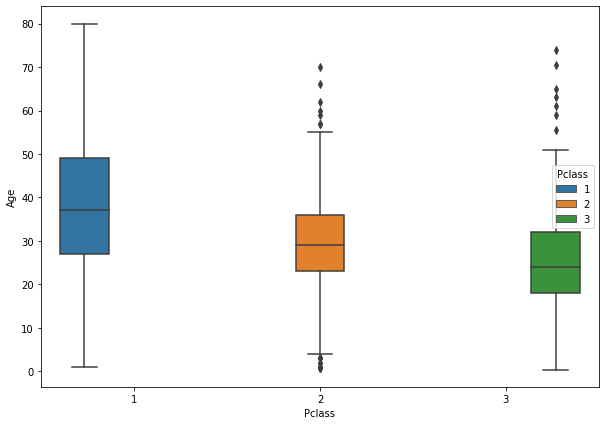

In [194]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass",y="Age",hue="Pclass",data=train_data)

In [195]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [198]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

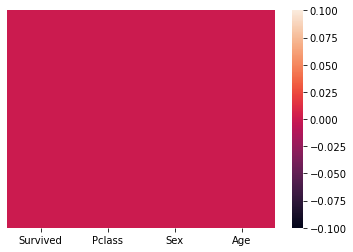

In [199]:
sns.heatmap(train_data.isnull(),yticklabels=False)

Now there is not even a single null value in a dataframe

In [111]:
train_data.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [112]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Pclass'], drop_first=True)

In [116]:
X_train=train_data.drop("Survived",axis=1)
y_train=train_data["Survived"]

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
model=RandomForestClassifier()

In [120]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [121]:
test=pd.read_csv("titanic_test.csv")

In [122]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [127]:
test_data=test[["PassengerId","Pclass","Age","Sex"]]

<AxesSubplot:>

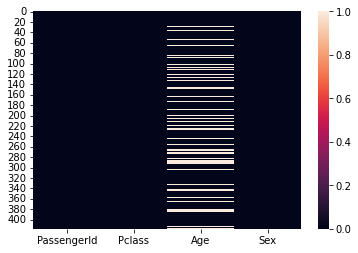

In [129]:
sns.heatmap(test_data.isnull())

In [130]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [200]:
test_data['Age'] = test_data[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

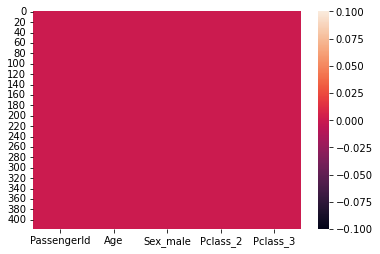

In [201]:
sns.heatmap(test_data.isnull())

In [133]:
test_data = pd.get_dummies(test_data, columns=['Sex', 'Pclass'], drop_first=True)

In [134]:
X_test=test_data.drop("PassengerId",axis=1)

In [135]:
X_test

,Age,Sex_male,Pclass_2,Pclass_3
0,34.5,1,0,1
1,47.0,0,0,1
2,62.0,1,1,0
3,27.0,1,0,1
4,22.0,0,0,1
...,...,...,...,...
413,24.0,1,0,1
414,39.0,0,0,0
415,38.5,1,0,1
416,24.0,1,0,1


In [136]:
predictions=model.predict(X_test)

In [148]:
predict=pd.DataFrame({"Name":test["Name"],"PassengerID":test_data["PassengerId"],"Survived":predictions})

In [187]:
predict.head()

,Name,PassengerID,Survived
0,"Kelly, Mr. James",892,0
1,"Wilkes, Mrs. James (Ellen Needs)",893,0
2,"Myles, Mr. Thomas Francis",894,1
3,"Wirz, Mr. Albert",895,1
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",896,1
